In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Grid Style
sns.set_style("whitegrid")

# For neural networks
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
import tensorflow as tf

# For data splitting and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [2]:
# For Reproducibility
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# Load the data
df=pd.read_csv(r"C:\Users\Michelle Lobb\Downloads\clean_data_3.csv")

In [4]:
# Features to train on


features=[ 'AVE_PAY', 
           'UNPAID_MONTHS',
            'PAY_1_TE']

In [5]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Y'],
                              test_size=0.1,
                              stratify=df["Y"],
                              shuffle=True,
                              random_state=123)

In [6]:
# Making validation set
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.1,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=123)

# Model 1: Adam optimizer, 64 neurons

In [7]:
model1 = models.Sequential()

model1.add(layers.Dense(64, activation = 'relu', input_shape = (3, )))
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(2, activation = 'softmax'))

model1.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', tf.keras.metrics.Recall()
                  ])

n_epochs = 100
batch_size = 512

history = model1.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)),
                        verbose = 0)

history_dict1 = history.history

In [8]:
y_pred1 = model1.predict(X_train_train, batch_size=512, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)

print(accuracy_score(y_train_train, y_pred_bool1))
print(recall_score(y_train_train, y_pred_bool1))

48/48 [==============================] - 0s 1ms/step
0.8193004115226338
0.3495813953488372


In [9]:
y_pred1 = model1.predict(X_val, batch_size=512, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)

print(accuracy_score(y_val, y_pred_bool1))
print(recall_score(y_val, y_pred_bool1))

6/6 [==============================] - 0s 1ms/step
0.827037037037037
0.3936348408710218


# Model 2: Rmsprop optimizer, 32 neurons

In [10]:
model2 = models.Sequential()

model2.add(layers.Dense(32, activation = 'relu', input_shape = (3, )))
model2.add(layers.Dense(32, activation = 'relu'))
model2.add(layers.Dense(2, activation = 'softmax'))

model2.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', tf.keras.metrics.Recall()
                  ])

n_epochs = 100
batch_size = 512

history2 = model2.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)),
                         verbose = 0)

history_dict2 = history2.history

In [11]:
y_pred2 = model2.predict(X_train_train, batch_size=512, verbose=1)
y_pred_bool2 = np.argmax(y_pred2, axis=1)

print(accuracy_score(y_train_train, y_pred_bool2))
print(recall_score(y_train_train, y_pred_bool2))

48/48 [==============================] - 0s 1ms/step
0.8194650205761317
0.3544186046511628


In [12]:
y_pred2 = model2.predict(X_val, batch_size=512, verbose=1)
y_pred_bool2 = np.argmax(y_pred2, axis=1)

print(accuracy_score(y_val, y_pred_bool2))
print(recall_score(y_val, y_pred_bool2))

6/6 [==============================] - 0s 1ms/step
0.827037037037037
0.39865996649916247


# Model 3: Adam optimizer, 32 neurons

In [13]:
model3 = models.Sequential()

model3.add(layers.Dense(32, activation = 'relu', input_shape = (3, )))
model3.add(layers.Dense(32, activation = 'relu'))
model3.add(layers.Dense(2, activation = 'softmax'))

model3.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', tf.keras.metrics.Recall()
                  ])

n_epochs = 100
batch_size = 512

history3 = model3.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)),
                         verbose = 0)

history_dict3 = history3.history

In [14]:
y_pred3 = model3.predict(X_train_train, batch_size=512, verbose=1)
y_pred_bool3 = np.argmax(y_pred3, axis=1)

print(accuracy_score(y_train_train, y_pred_bool3))
print(recall_score(y_train_train, y_pred_bool3))

48/48 [==============================] - 0s 1ms/step
0.8193004115226338
0.35293023255813954


In [15]:
y_pred3 = model3.predict(X_val, batch_size=512, verbose=1)
y_pred_bool3 = np.argmax(y_pred3, axis=1)

print(accuracy_score(y_val, y_pred_bool3))
print(recall_score(y_val, y_pred_bool3))

6/6 [==============================] - 0s 1ms/step
0.827037037037037
0.3936348408710218


# Model 4: Rmsprop optimizer, 64 neurons

In [16]:
model4 = models.Sequential()

model4.add(layers.Dense(64, activation = 'relu', input_shape = (3, )))
model4.add(layers.Dense(64, activation = 'relu'))
model4.add(layers.Dense(2, activation = 'softmax'))

model4.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', tf.keras.metrics.Recall()
                  ])

n_epochs = 100
batch_size = 512

history4 = model4.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)),
                         verbose = 0)

history_dict4 = history4.history

In [17]:
y_pred4 = model4.predict(X_train_train, batch_size=512, verbose=1)
y_pred_bool4 = np.argmax(y_pred4, axis=1)

print(accuracy_score(y_train_train, y_pred_bool4))
print(recall_score(y_train_train, y_pred_bool4))

48/48 [==============================] - 0s 1ms/step
0.8196707818930041
0.35572093023255813


In [18]:
y_pred4 = model4.predict(X_val, batch_size=512, verbose=1)
y_pred_bool4 = np.argmax(y_pred4, axis=1)

print(accuracy_score(y_val, y_pred_bool4))
print(recall_score(y_val, y_pred_bool4))

6/6 [==============================] - 0s 2ms/step
0.8274074074074074
0.4036850921273032


# Test Performance

In [19]:
y_pred1 = model1.predict(X_test, batch_size=512, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)

print(accuracy_score(y_test, y_pred_bool1))
print(recall_score(y_test, y_pred_bool1))

6/6 [==============================] - 0s 2ms/step
0.818
0.3358433734939759


In [20]:
y_pred2 = model2.predict(X_test, batch_size=512, verbose=1)
y_pred_bool2 = np.argmax(y_pred2, axis=1)

print(accuracy_score(y_test, y_pred_bool2))
print(recall_score(y_test, y_pred_bool2))

6/6 [==============================] - 0s 2ms/step
0.819
0.34036144578313254


In [21]:
y_pred3 = model3.predict(X_test, batch_size=512, verbose=1)
y_pred_bool3 = np.argmax(y_pred3, axis=1)

print(accuracy_score(y_test, y_pred_bool3))
print(recall_score(y_test, y_pred_bool3))

6/6 [==============================] - 0s 1ms/step
0.8186666666666667
0.338855421686747


In [22]:
y_pred4 = model4.predict(X_test, batch_size=512, verbose=1)
y_pred_bool4 = np.argmax(y_pred4, axis=1)

print(accuracy_score(y_test, y_pred_bool4))
print(recall_score(y_test, y_pred_bool4))

6/6 [==============================] - 0s 2ms/step
0.819
0.34186746987951805


# Visual Comparison of Accuracy Performance

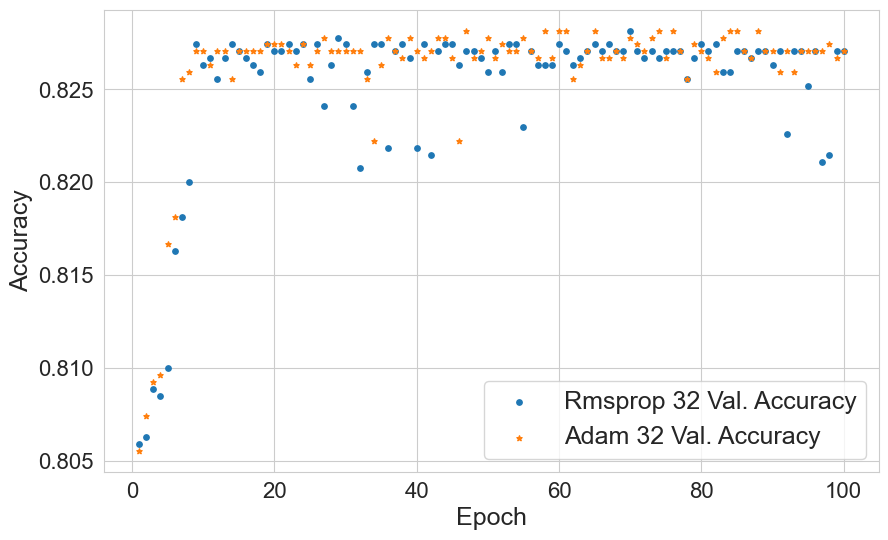

In [23]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict2['val_accuracy'], s = 15, label = "Rmsprop 32 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict3['val_accuracy'], marker='*',s = 15, label = "Adam 32 Val. Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

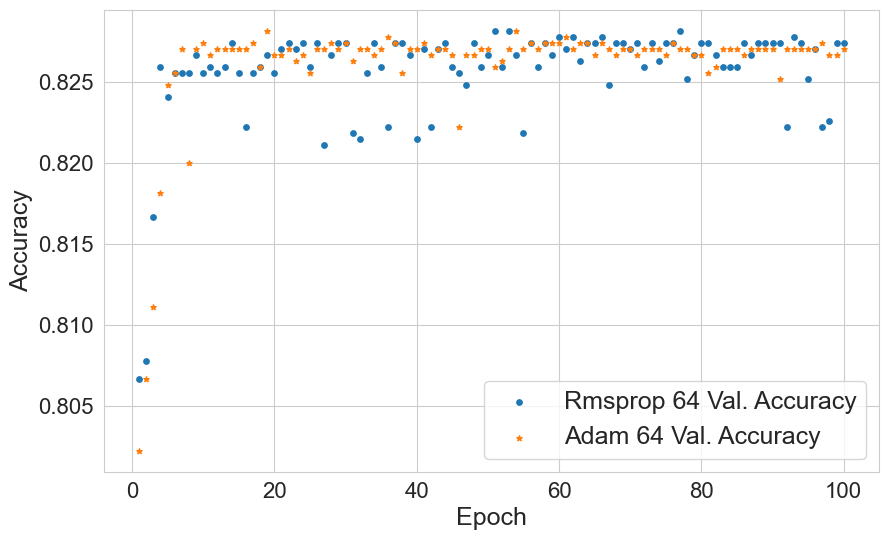

In [24]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict4['val_accuracy'], s = 15, label = "Rmsprop 64 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict1['val_accuracy'], marker='*',s = 15, label = "Adam 64 Val. Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

# Comparison of Models

Creating baseline:

In [25]:
#define N as the number of observations that are 1
N = df['Y'].value_counts()[1]

#define T as the total number of observations
T = len(df)

In [26]:
#define probs as a list of probabilities P
iters=10
probs=[(1/iters)*i for i in range(0,iters+1)]

In [27]:
#Accuracy = (TP+TN)/TOTAL
accuracy = [(N*P+(1-P)*(T-N))/T for P in probs]

#recall = TP/(TN+FP)
recall=[N*P/N for P in probs]


Plotting:

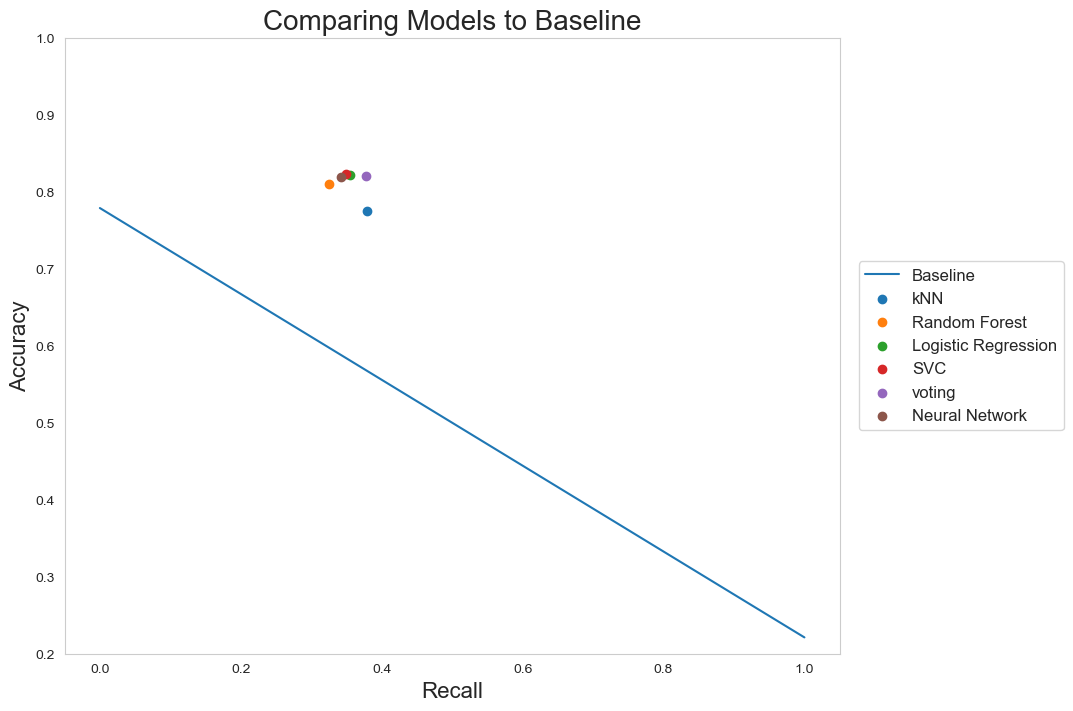

In [28]:
plt.figure(figsize=(10,8))

plt.plot(recall, accuracy,
        label='Baseline')

plt.title('Comparing Models to Baseline', fontsize=20)

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.scatter(0.3789, 0.7753,
       label='kNN')

plt.scatter(0.3253, 0.8103,
           label='Random Forest')

plt.scatter(0.3554, 0.8213,
           label='Logistic Regression')

plt.scatter(0.3494, 0.8227,
           label='SVC')

plt.scatter(0.378, 0.8203,
           label='voting')

plt.scatter(0.3419, 0.8190,
           label='Neural Network')

#plt.plot([0,1],[accuracy[0], accuracy[0]])


plt.ylim((0.2,1))
plt.grid()
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5), fontsize=12)

plt.show()